# 6.3 Geographical Viualizations with Python

## Imports

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

In [103]:
# Import json file as string for map

country_geo = r'C:\Users\malac\Downloads\Realtor.com cf\02 Data\Original Data\us-states.json'

In [104]:
country_geo

'C:\\Users\\malac\\Downloads\\Realtor.com cf\\02 Data\\Original Data\\us-states.json'

In [105]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\malac\Downloads\Realtor.com cf\02 Data\Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [87]:
path = r"C:\Users\malac\Downloads\Realtor.com cf"

In [6]:
path

'C:\\Users\\malac\\Downloads\\Realtor.com cf'

In [7]:
# Import recipe dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'recipes.csv'))

In [8]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(20052, 680)

# Data Wrangling

## Fix Dummies

In [10]:
# Select necessary colummns and put them in list named columns

columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin",
"title",
"rating",
"calories",
"protein",
"fat",
"sodium"
]

In [11]:
# Create subset with list

state_rec = df[columns]

In [12]:
state_rec.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,...,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0


In [13]:
# Select only states from state_rec

states_num = state_rec[["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [15]:
# Turn dummy data from states into categorical variable in s2

s2 = states_num.idxmax(axis=1)

In [16]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [17]:
type(s2)

pandas.core.series.Series

In [18]:
# Create new column called state_name in state_rec

state_rec['STATE_NAME'] = s2

C:\Users\malac\AppData\Local\Temp/ipykernel_2252/3467011305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = s2


In [19]:
state_rec.columns

Index(['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'nebraska',
       'new hampshire', 'new jersey', 'new mexico', 'new york',
       'north carolina', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhode island', 'south carolina', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [20]:
# Drop dummy columns in state_rec

state_rec.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"], inplace = True)

C:\Users\malac\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [22]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california


In [25]:
state_rec.shape

(20052, 7)

## State Names need to be capital to match json file!

In [26]:
# Change state_nae to proper case

state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()

C:\Users\malac\AppData\Local\Temp/ipykernel_2252/132021477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()


In [27]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,Alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,Alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,New York
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,Alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,California


# Data Cleaning

In [28]:
state_rec.shape

(20052, 7)

In [29]:
# Check for missing values

state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [30]:
# Impute missing values with median

state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
state_rec['fat'].fillna(state_rec['fat'].median(), inplace=True)
state_rec['sodium'].fillna(state_rec['sodium'].median(), inplace=True)

C:\Users\malac\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [32]:
# Recheck values

state_rec.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

In [41]:
# Check for dups

dups = state_rec.duplicated()

In [42]:
dups.shape

(20052,)

No dups

## Histograms for extreme values check

<AxesSubplot:xlabel='fat', ylabel='Count'>

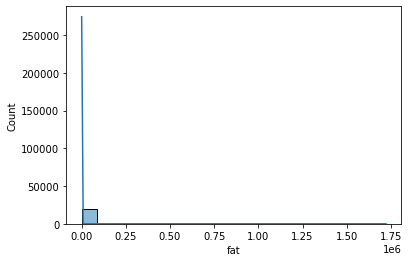

In [ ]:
# Show extreme values for fat

sns.histplot(state_rec['fat'], bins = 20, kde = True)

In [51]:
# Check extreme values

state_rec[state_rec['fat'] >1000]

,title,rating,calories,protein,fat,sodium,STATE_NAME,cal_per_portion


In [52]:
# Remove values below 500

state_rec = state_rec[state_rec['fat'] < 500]

In [53]:
state_rec.shape

(20012, 8)

In [54]:
# Create cal per portion column

state_rec['cal_per_portion'] = state_rec['calories']*4

In [55]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'STATE_NAME',
       'cal_per_portion'],
      dtype='object')

<AxesSubplot:xlabel='cal_per_portion', ylabel='Count'>

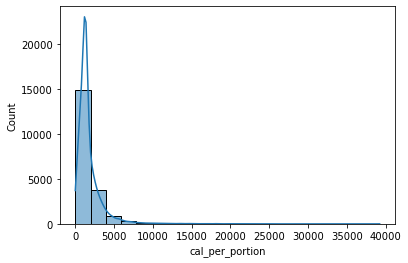

In [56]:
# Show extremes for cal per portion

sns.histplot(state_rec['cal_per_portion'], bins = 20, kde = True)

In [57]:
# Remove values above 8000

state_rec = state_rec[state_rec['cal_per_portion'] < 8000]

In [58]:
state_rec.shape

(19714, 8)

<AxesSubplot:xlabel='rating', ylabel='Count'>

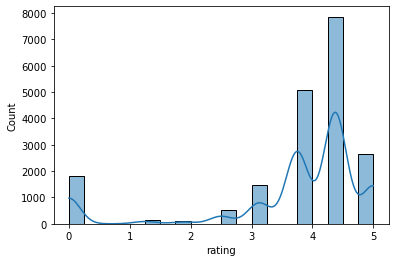

In [60]:
# Check rating variable

sns.histplot(state_rec['rating'], bins = 20, kde = True)

In [61]:
# Remove ratings less than 1 

state_rec = state_rec[state_rec['rating'] >=1]

In [63]:
state_rec.shape

(17902, 8)

In [65]:
state_rec.dtypes

title               object
rating             float64
calories           float64
protein            float64
fat                float64
sodium             float64
STATE_NAME          object
cal_per_portion    float64
dtype: object

# Plotting Choropleth with Geoplot

In [66]:
# Create subset of what we want to see

data_to_plot = state_rec[['STATE_NAME','rating']]

In [ ]:
# Create choropleth

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.id.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\malac\\Downloads\\Realtor.com cf\\02 Data\\Original Data\\us-states6.3.json'

In [72]:
data_to_plot.head()

,STATE_NAME,rating
0,Alabama,2.500
1,Alabama,4.375
2,New York,3.750
3,Alabama,5.000
4,California,3.125


In [106]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map